In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
daily_prices = pd.read_parquet("sp500_daily_prices.parquet")

In [9]:
daily_prices.head(2)

,date,close,symbol
2544,2010-01-04,31.30,A
2545,2010-01-05,30.96,A


In [10]:
apple = daily_prices.loc[daily_prices.symbol == "AAPL"]

In [12]:
apple.tail(2)

,date,close,symbol
83068,2023-08-04,181.99,AAPL
83069,2023-08-07,179.32,AAPL


In [13]:
stocks = ( daily_prices
          .loc[daily_prices.symbol.isin(["AAPL", "IBM", "BA", "NVDA"])] 
          .pivot(index="date", columns="symbol", values="close")
         )

In [14]:
stocks

symbol,AAPL,BA,IBM,NVDA
date,,,,
2010-01-04,7.6432,56.18,132.45,4.6225
2010-01-05,7.6564,58.02,130.85,4.6900
2010-01-06,7.5346,59.78,130.00,4.7200
2010-01-07,7.5207,62.20,129.55,4.6275
2010-01-08,7.5707,61.60,130.85,4.6375
...,...,...,...,...
2023-08-01,195.6050,238.01,143.33,465.0700
2023-08-02,192.5800,231.38,144.17,442.6900
2023-08-03,191.1700,231.36,144.45,445.1500


### 1) Line Plots

In [21]:
ts = pd.Series(np.random.randn(365), index=pd.date_range("1/1/2023", periods=365, freq="D"))
ts = ts.cumsum()
ts

2023-01-01    0.504642
2023-01-02    1.000199
2023-01-03    1.137389
2023-01-04    1.279711
2023-01-05   -0.033995
                ...   
2023-12-27    3.137859
2023-12-28    3.223281
2023-12-29    4.600293
2023-12-30    3.625776
2023-12-31    2.622737
Freq: D, Length: 365, dtype: float64

<Axes: >

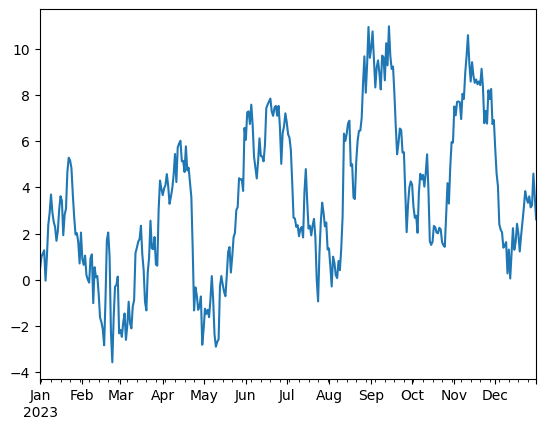

In [22]:
ts.plot()

In [24]:
apple

,date,close,symbol
79646,2010-01-04,7.6432,AAPL
79647,2010-01-05,7.6564,AAPL
79648,2010-01-06,7.5346,AAPL
79649,2010-01-07,7.5207,AAPL
79650,2010-01-08,7.5707,AAPL
...,...,...,...
83065,2023-08-01,195.6050,AAPL
83066,2023-08-02,192.5800,AAPL
83067,2023-08-03,191.1700,AAPL
83068,2023-08-04,181.9900,AAPL


<Axes: xlabel='date'>

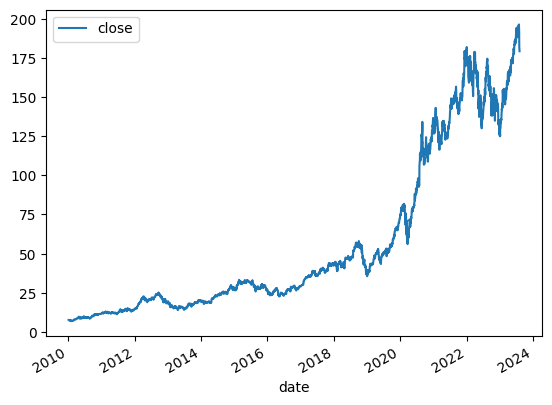

In [25]:
apple.plot(x="date", y="close")

<Axes: xlabel='date'>

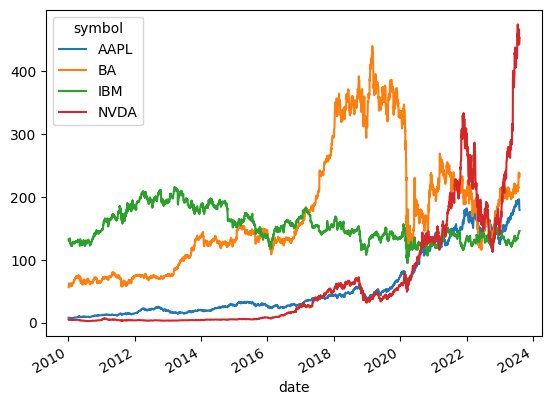

In [26]:
stocks.plot()

In [27]:
stocks.head(2)

symbol,AAPL,BA,IBM,NVDA
date,,,,
2010-01-04,7.6432,56.18,132.45,4.6225
2010-01-05,7.6564,58.02,130.85,4.6900


<Axes: title={'center': 'Stocks Chart'}, xlabel='date'>

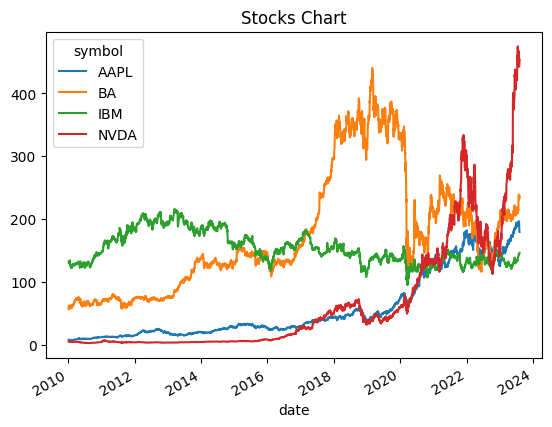

In [28]:
# Add Title
stocks.plot(title="Stocks Chart")

<Axes: title={'center': 'Stocks Chart'}, xlabel='Time Periods', ylabel='Stock Price ($)'>

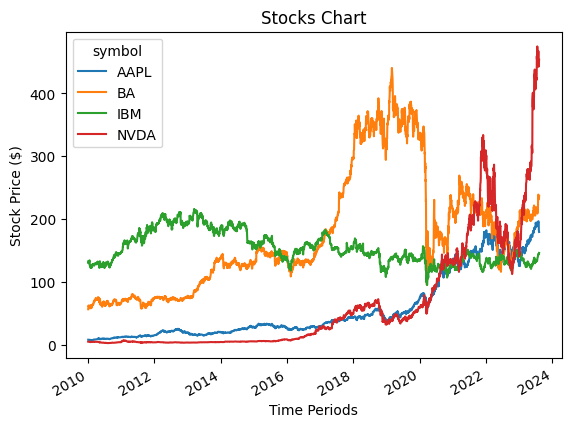

In [30]:
# Add axis labels
stocks.plot(title="Stocks Chart", xlabel = "Time Periods", ylabel="Stock Price ($)")

<Axes: title={'center': 'Stocks Chart'}, xlabel='Time Periods', ylabel='Stock Price ($)'>

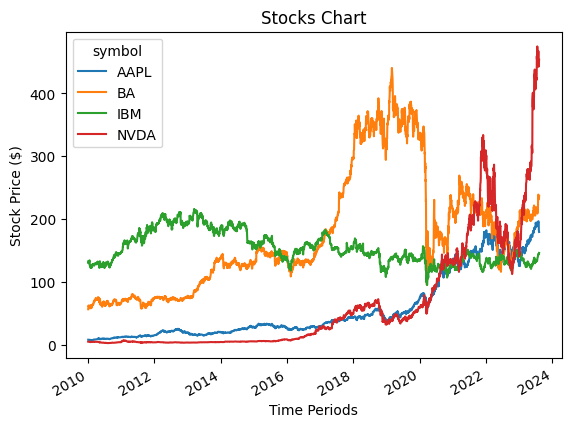

In [35]:
# Legend On/Off
stocks.plot(title="Stocks Chart", xlabel = "Time Periods", ylabel="Stock Price ($)", legend=True)

<Axes: title={'center': 'Stocks Chart'}, xlabel='Time Periods', ylabel='Stock Price ($)'>

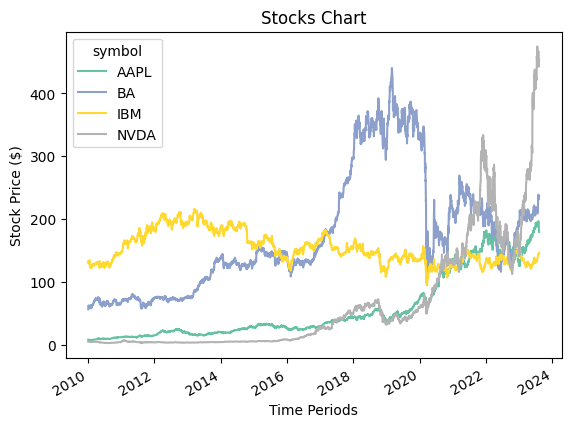

In [39]:
# Customize colors
stocks.plot(title="Stocks Chart", xlabel = "Time Periods", ylabel="Stock Price ($)", cmap="Set2")

<Axes: >

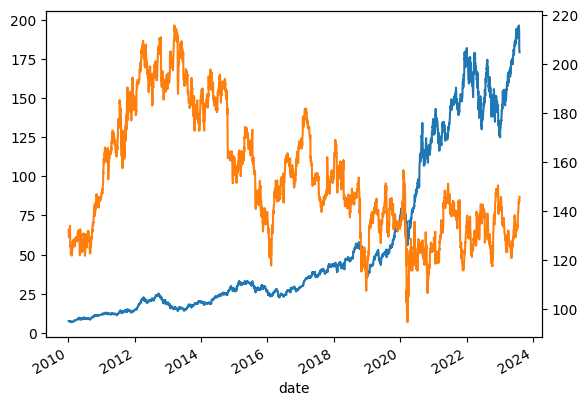

In [42]:
# Add a secondary_y axis
stocks["AAPL"].plot()
stocks["IBM"].plot(secondary_y=True)

<Axes: xlabel='date'>

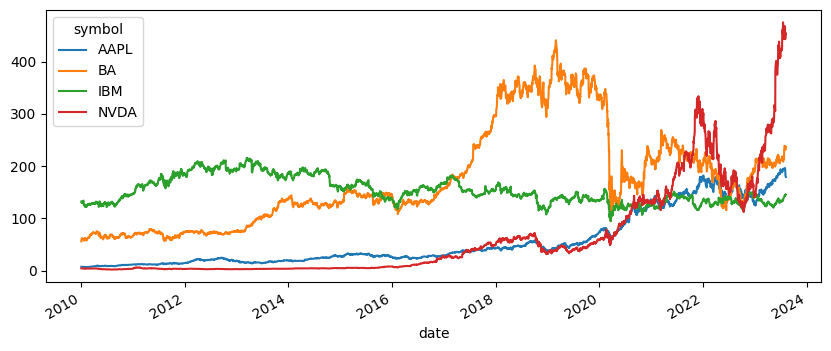

In [46]:
# Control Figure Size (figsize)
stocks.plot(figsize=(10, 4))

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>,
        <Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

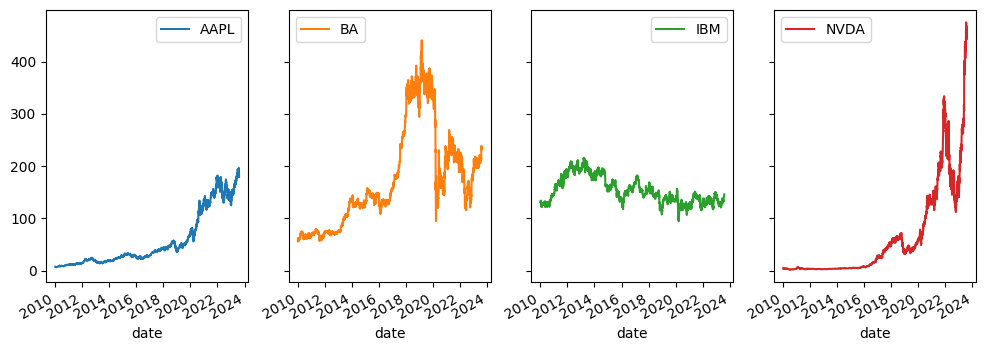

In [70]:
# Subplots
stocks.plot(subplots=True, layout=(1, 4), figsize=(12, 4), sharey=True)

array([[<Axes: xlabel='date'>],
       [<Axes: xlabel='date'>],
       [<Axes: xlabel='date'>],
       [<Axes: xlabel='date'>]], dtype=object)

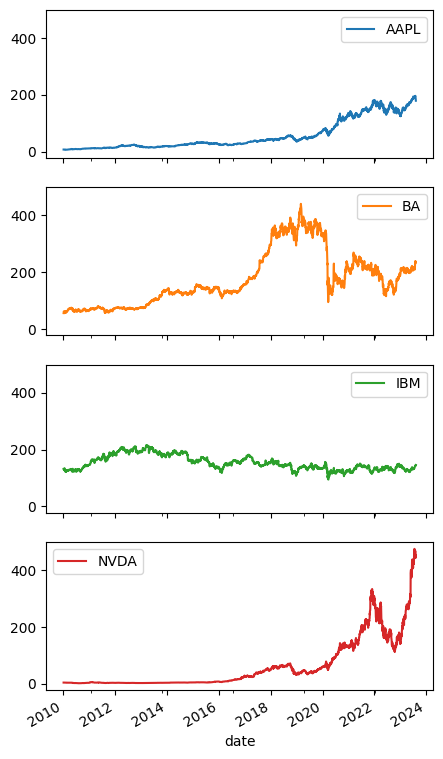

In [72]:
stocks.plot(subplots=True, layout=(4, 1), figsize=(5, 10), sharey=True, sharex=True)

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

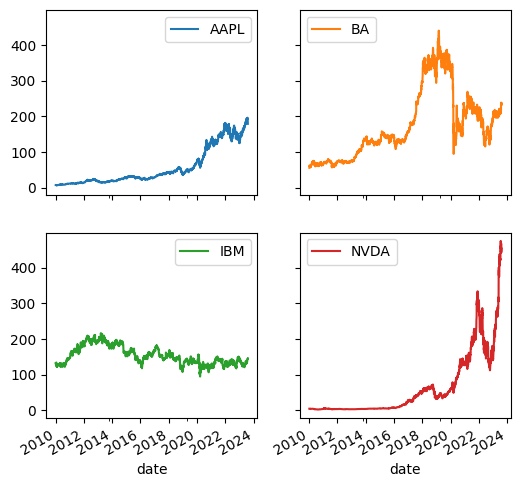

In [77]:
stocks.plot(subplots=True, layout=(2, 2), figsize=(6, 6), sharey=True, sharex=True)

### 2) Bar Plots

In [92]:
data1 = pd.DataFrame({
    "Department": ["Dept-A", "Dept-B", "Dept-C", "Dept-D"],
    "TV_Sales": [100, 50, 70, 210],
    "Fridge_Sales": [10, 5, 10, 30]
})
data1

,Department,TV_Sales,Fridge_Sales
0,Dept-A,100,10
1,Dept-B,50,5
2,Dept-C,70,10
3,Dept-D,210,30


<Axes: title={'center': 'Sales Breakdown'}, xlabel='Department'>

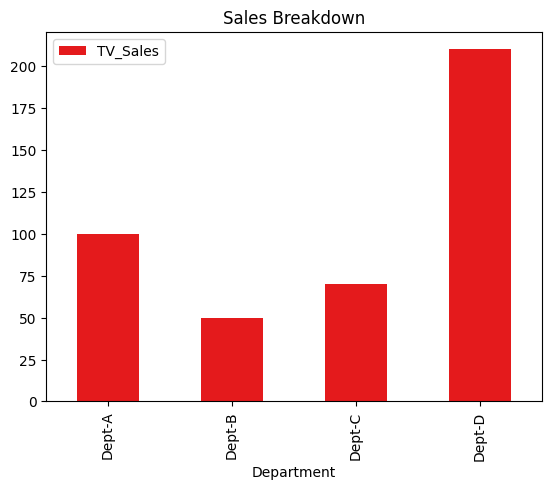

In [94]:
# Vertical Bars
data1.plot.bar(x="Department", y="TV_Sales", title="Sales Breakdown", cmap="Set1")

<Axes: title={'center': 'Sales Breakdown'}, xlabel='Department'>

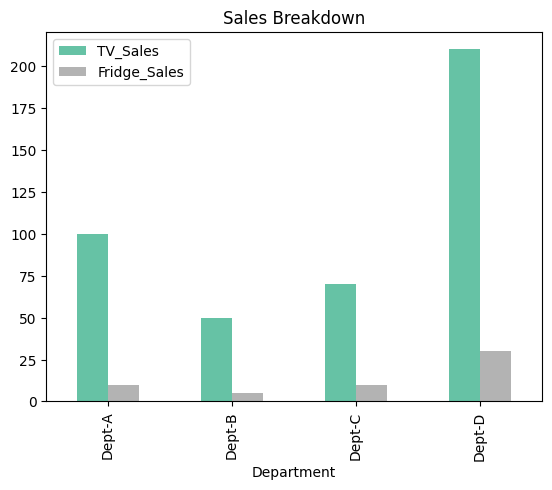

In [97]:
data1.plot.bar(x="Department",  y=["TV_Sales", "Fridge_Sales"], title="Sales Breakdown", cmap="Set2")

<Axes: title={'center': 'Sales Breakdown'}, xlabel='Sales in Units', ylabel='Department'>

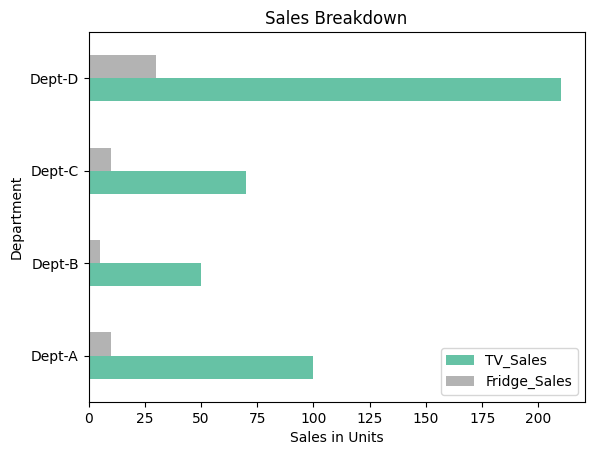

In [99]:
# Horizontal Bars
data1.plot.barh(x="Department",  y=["TV_Sales", "Fridge_Sales"], title="Sales Breakdown", cmap="Set2", xlabel = "Sales in Units")


In [ ]:
# Stacked Bars

<Axes: title={'center': 'Sales Breakdown'}, xlabel='Department'>

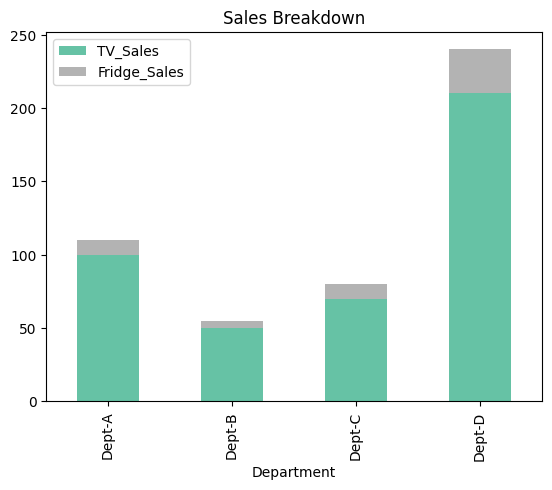

In [100]:
data1.plot.bar(x="Department",  y=["TV_Sales", "Fridge_Sales"], title="Sales Breakdown", cmap="Set2", stacked=True)

<Axes: title={'center': 'Sales Breakdown'}, ylabel='Department'>

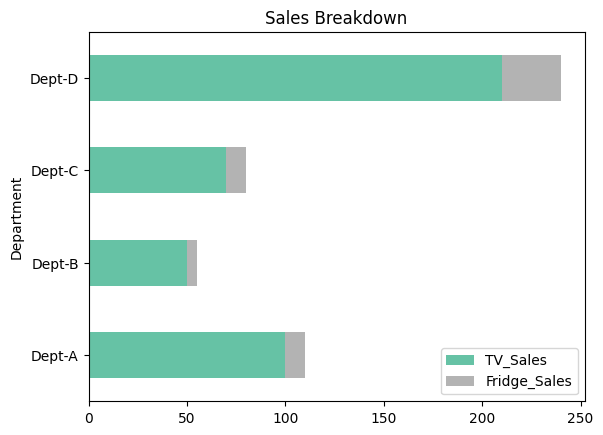

In [101]:
data1.plot.barh(x="Department",  y=["TV_Sales", "Fridge_Sales"], title="Sales Breakdown", cmap="Set2", stacked=True)

### 3) Scatter Plots

In [102]:
iris = pd.read_csv("iris.csv")
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [103]:
# Set categorical variable
iris.Name = iris.Name.astype("category")

In [104]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   SepalLength  150 non-null    float64 
 1   SepalWidth   150 non-null    float64 
 2   PetalLength  150 non-null    float64 
 3   PetalWidth   150 non-null    float64 
 4   Name         150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


<Axes: xlabel='SepalLength', ylabel='SepalWidth'>

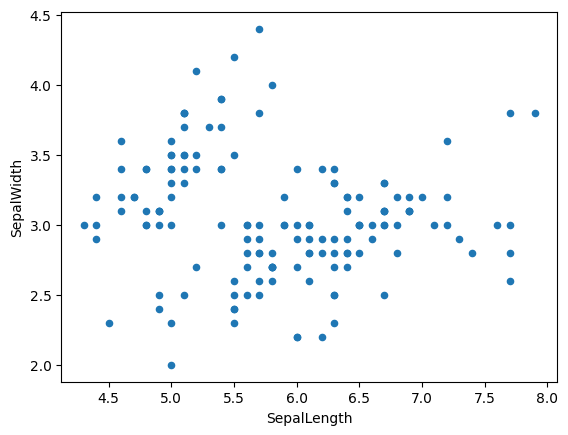

In [110]:
# Plain x-y scatter plots
iris.plot.scatter(x="SepalLength", y = "SepalWidth")

<Axes: xlabel='SepalLength', ylabel='SepalWidth'>

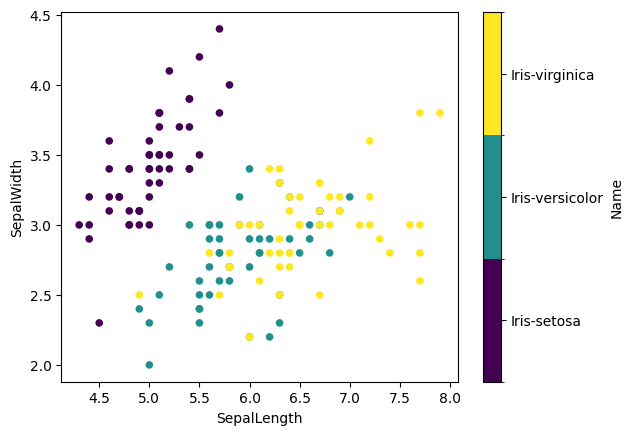

In [111]:
# x-y with categorical variable
iris.plot.scatter(x="SepalLength", y = "SepalWidth", c="Name", cmap="viridis")

In [112]:
# With point size
iris.head(2)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [117]:
iris["Petal_Length_1"] = iris.PetalLength * 20

<Axes: xlabel='SepalLength', ylabel='SepalWidth'>

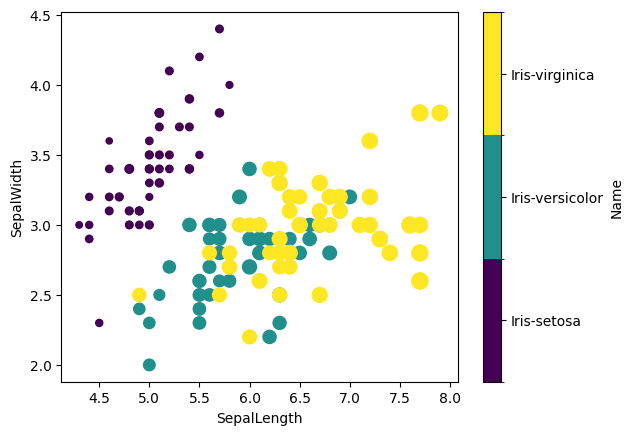

In [118]:
iris.plot.scatter(x="SepalLength", y = "SepalWidth", c="Name", cmap="viridis", s="Petal_Length_1")

### 4) Histograms

In [119]:
df4 = pd.DataFrame(
    {
        "X": np.random.randn(1000) + 2,
        "Y": np.random.randn(1000),
        "Z": np.random.randn(1000) - 2,
    },
)

df4

,X,Y,Z
0,-0.372426,-0.369874,-2.702004
1,1.875003,1.214586,-1.349644
2,2.203567,0.425610,-1.818623
3,2.172259,0.388759,-2.179523
4,1.723860,0.290728,-1.966575
...,...,...,...
995,-0.102790,0.446110,-1.551785
996,1.127135,0.029424,-1.951333
997,2.089044,0.259374,-0.879787
998,0.889687,-1.442036,-0.696500


<Axes: ylabel='Frequency'>

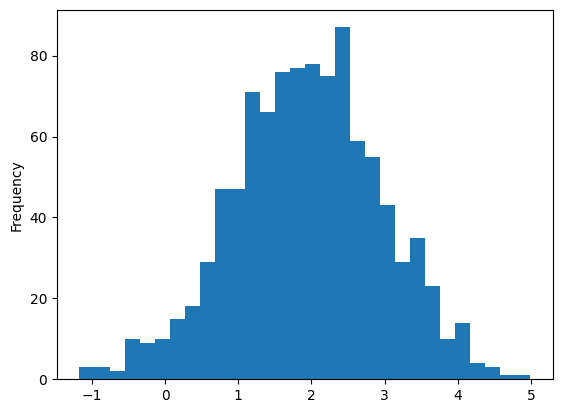

In [122]:
df4["X"].plot.hist(bins = 30)

<Axes: ylabel='Frequency'>

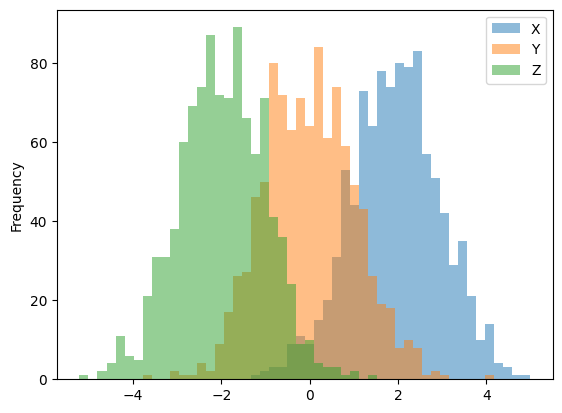

In [126]:
df4.plot.hist(bins = 50, alpha = 0.5)

In [ ]:
# Changing number of bins

### 5) Area Plot

<Axes: xlabel='date'>

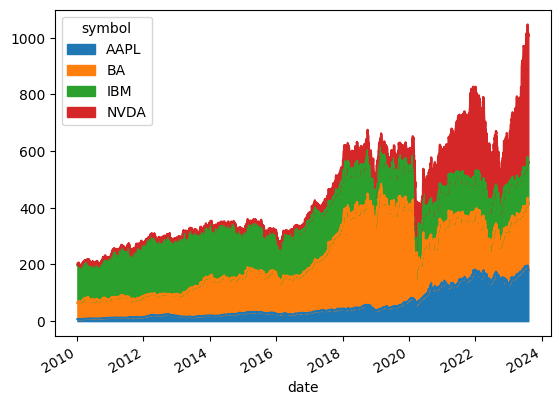

In [129]:
stocks.plot.area(stacked=True)

<Axes: xlabel='date'>

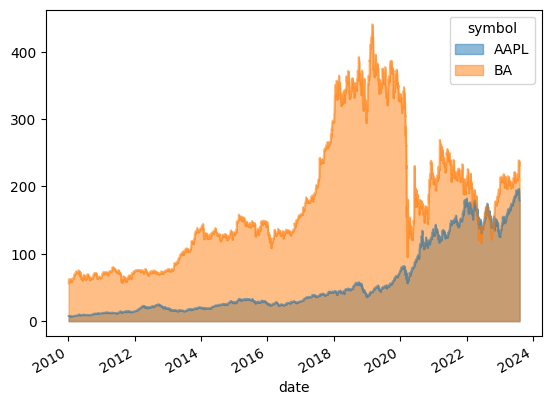

In [133]:
stocks[["AAPL", "BA"]].plot.area(stacked=False)

### 6) Pie Plot

In [134]:
data1

,Department,TV_Sales,Fridge_Sales
0,Dept-A,100,10
1,Dept-B,50,5
2,Dept-C,70,10
3,Dept-D,210,30


<Axes: ylabel='Fridge_Sales'>

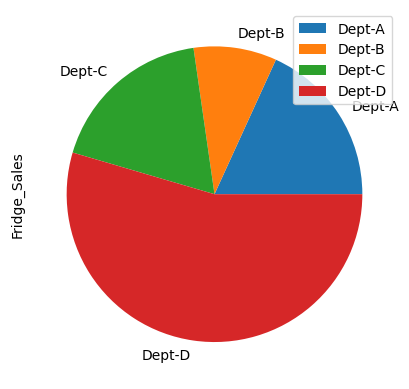

In [136]:
data1.plot.pie(y="Fridge_Sales", labels=data1.Department)

<Axes: xlabel='Department'>

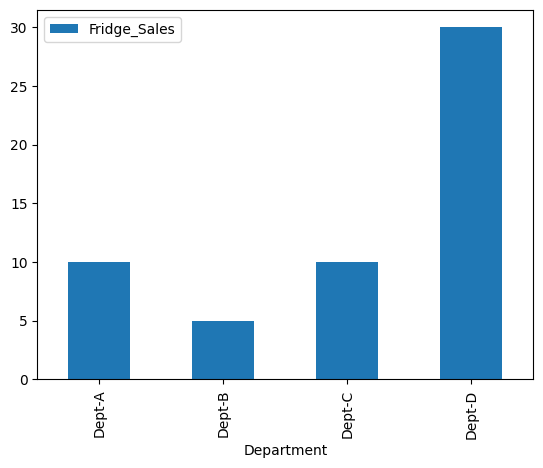

In [138]:
data1.plot.bar(x="Department", y="Fridge_Sales")